In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [9]:
bn = gum.loadBN("instances/bn-20n-20a-1.bif")
bn

(pyagrum.BayesNet@0x101dcb800) BN{nodes: 20, arcs: 20, domainSize: 10^9.4116, dim: 204, mem: 2Ko 360o}

In [4]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-20n-20a-1-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


CPU times: user 21.2 s, sys: 1.12 s, total: 22.4 s
Wall time: 2.82 s
CPU times: user 8.2 s, sys: 434 ms, total: 8.63 s
Wall time: 1.04 s


## Results of the data/bn-20n-20a-1-test8.csv

### Markov equivalence class (PAG)

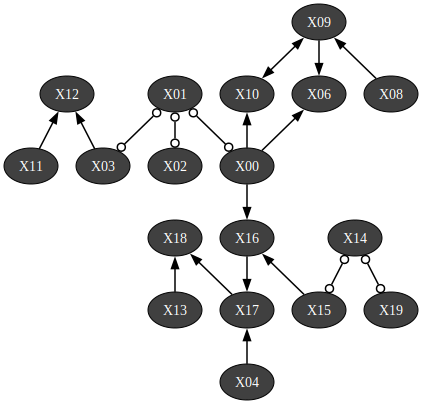

### Causal differences

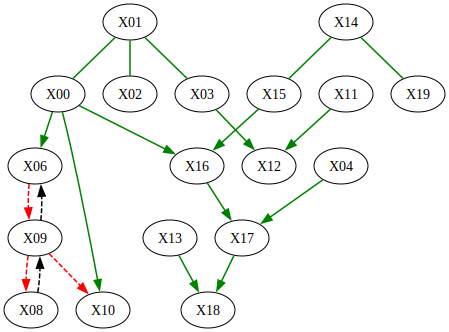

CPU times: user 23.2 s, sys: 1.15 s, total: 24.3 s
Wall time: 2.64 s
CPU times: user 8.63 s, sys: 467 ms, total: 9.1 s
Wall time: 1.1 s


## Results of the data/bn-20n-20a-1-test9.csv

### Markov equivalence class (PAG)

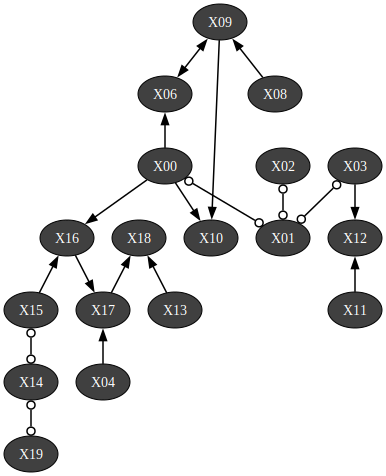

### Causal differences

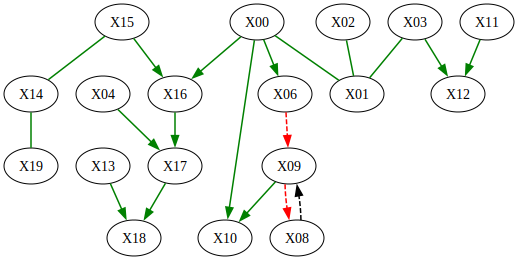

CPU times: user 20.8 s, sys: 1.23 s, total: 22.1 s
Wall time: 2.71 s
CPU times: user 8.33 s, sys: 501 ms, total: 8.83 s
Wall time: 1.18 s


## Results of the data/bn-20n-20a-1-test10.csv

### Markov equivalence class (PAG)

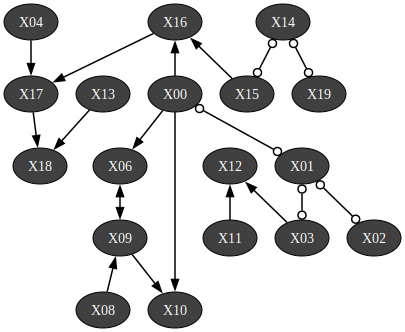

### Causal differences

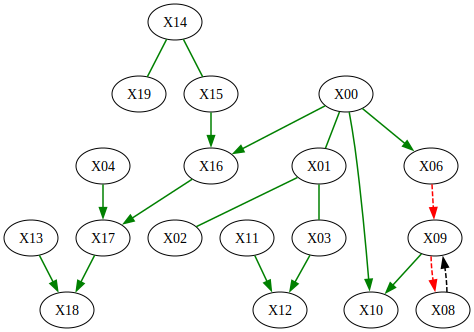

CPU times: user 22.5 s, sys: 1.17 s, total: 23.7 s
Wall time: 2.66 s
CPU times: user 16.9 s, sys: 942 ms, total: 17.9 s
Wall time: 2.1 s


## Results of the data/bn-20n-20a-1-test4.csv

### Markov equivalence class (PAG)

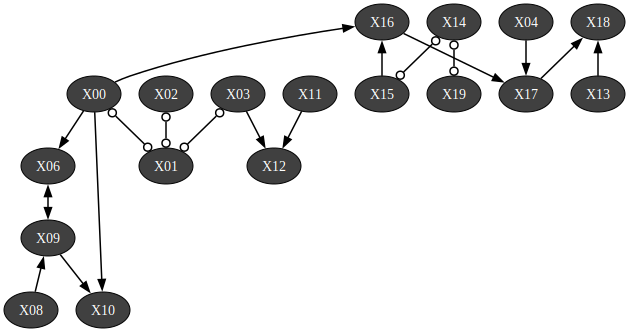

### Causal differences

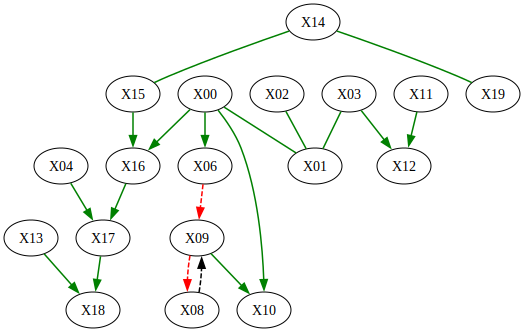

CPU times: user 22.7 s, sys: 1.16 s, total: 23.9 s
Wall time: 2.63 s
CPU times: user 9.09 s, sys: 552 ms, total: 9.65 s
Wall time: 1.22 s


## Results of the data/bn-20n-20a-1-test5.csv

### Markov equivalence class (PAG)

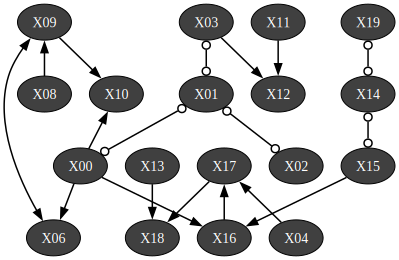

### Causal differences

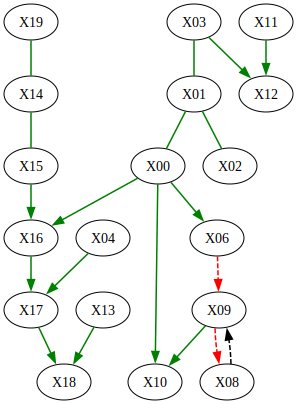

CPU times: user 20.8 s, sys: 1.2 s, total: 21.9 s
Wall time: 2.62 s
CPU times: user 15.8 s, sys: 947 ms, total: 16.7 s
Wall time: 2.03 s


## Results of the data/bn-20n-20a-1-test7.csv

### Markov equivalence class (PAG)

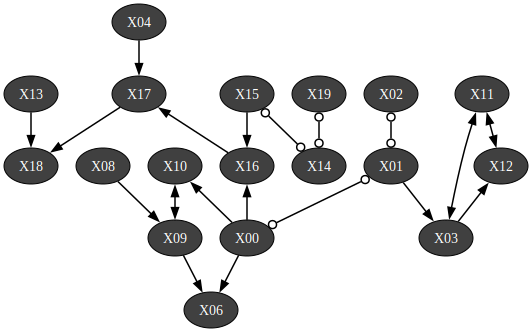

### Causal differences

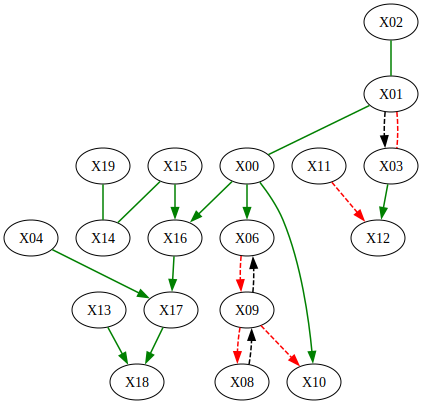

CPU times: user 21.3 s, sys: 1.15 s, total: 22.4 s
Wall time: 2.62 s
CPU times: user 7.81 s, sys: 413 ms, total: 8.22 s
Wall time: 949 ms


## Results of the data/bn-20n-20a-1-test6.csv

### Markov equivalence class (PAG)

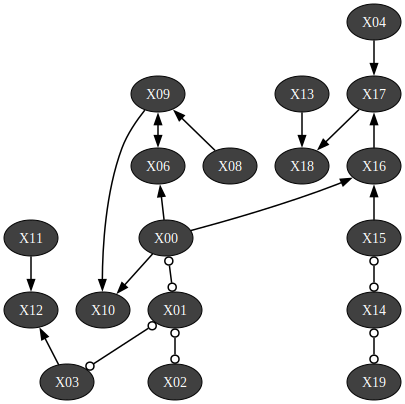

### Causal differences

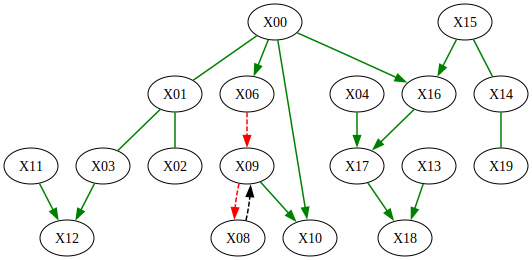

CPU times: user 19.8 s, sys: 1.11 s, total: 20.9 s
Wall time: 2.64 s
CPU times: user 7.65 s, sys: 431 ms, total: 8.08 s
Wall time: 1 s


## Results of the data/bn-20n-20a-1-test2.csv

### Markov equivalence class (PAG)

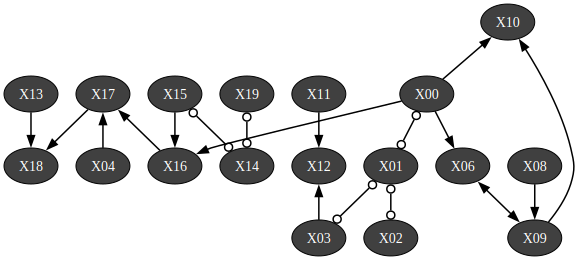

### Causal differences

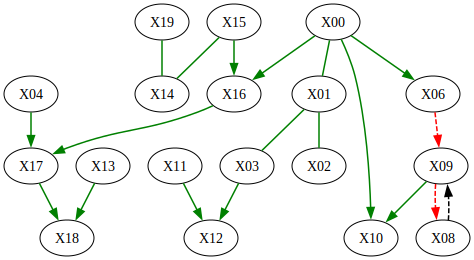

CPU times: user 20.2 s, sys: 1.13 s, total: 21.3 s
Wall time: 2.62 s
CPU times: user 7.84 s, sys: 461 ms, total: 8.31 s
Wall time: 1.11 s


## Results of the data/bn-20n-20a-1-test3.csv

### Markov equivalence class (PAG)

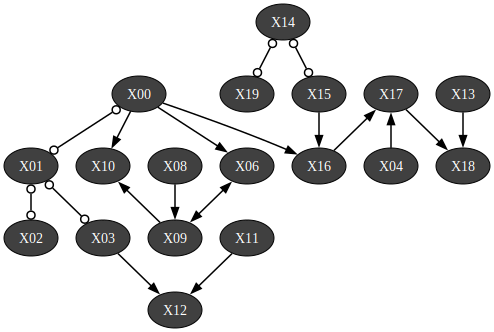

### Causal differences

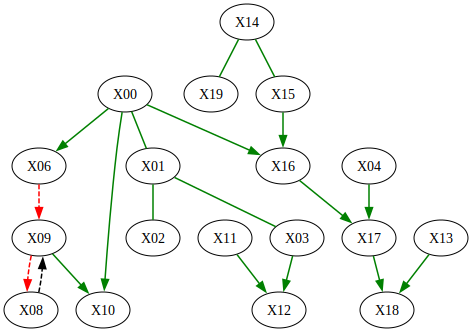

CPU times: user 20.9 s, sys: 1.32 s, total: 22.2 s
Wall time: 6.7 s
CPU times: user 11 s, sys: 716 ms, total: 11.7 s
Wall time: 3.55 s


## Results of the data/bn-20n-20a-1-test1.csv

### Markov equivalence class (PAG)

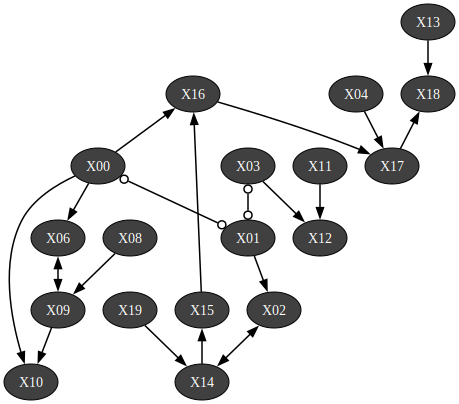

### Causal differences

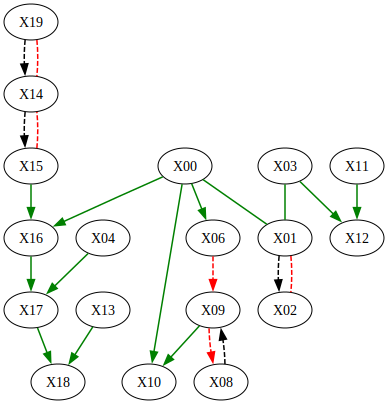

In [11]:
from pathlib import Path

for name in Path("data/").glob("bn-20n-20a-1-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X07", "X05"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )

CPU times: user 22.6 s, sys: 1.3 s, total: 23.9 s
Wall time: 6.61 s
CPU times: user 34.7 s, sys: 2.11 s, total: 36.8 s
Wall time: 8.05 s


## Results of the data/bn-20n-20a-1-test8.csv

### Markov equivalence class (PAG)

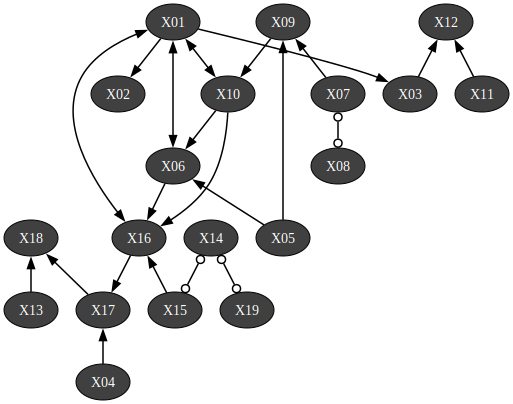

### Causal differences

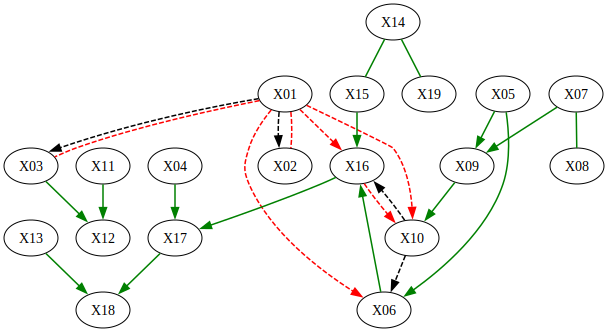

CPU times: user 22.4 s, sys: 1.26 s, total: 23.7 s
Wall time: 3.22 s
CPU times: user 42.2 s, sys: 2.64 s, total: 44.9 s
Wall time: 8.51 s


## Results of the data/bn-20n-20a-1-test9.csv

### Markov equivalence class (PAG)

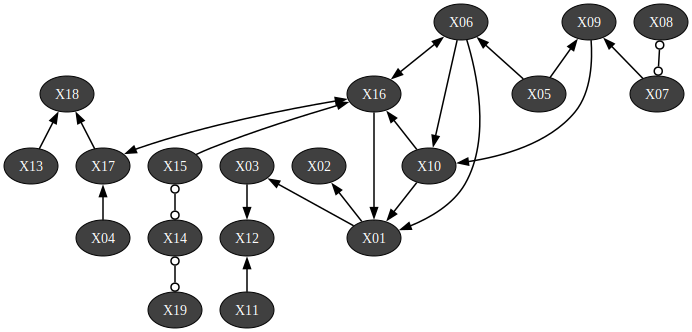

### Causal differences

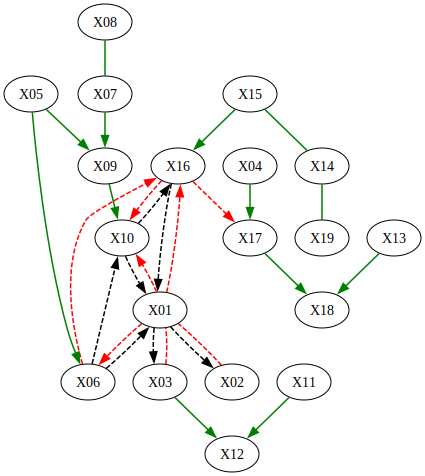

CPU times: user 24 s, sys: 1.36 s, total: 25.4 s
Wall time: 7.1 s
CPU times: user 1min 2s, sys: 4.71 s, total: 1min 6s
Wall time: 20.4 s


## Results of the data/bn-20n-20a-1-test10.csv

### Markov equivalence class (PAG)

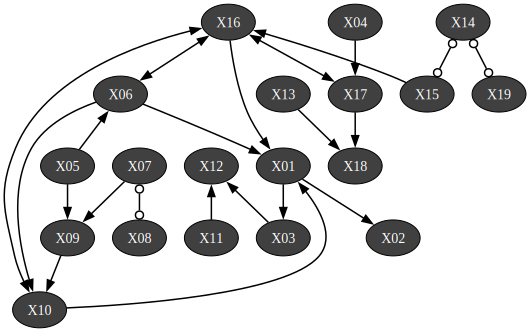

### Causal differences

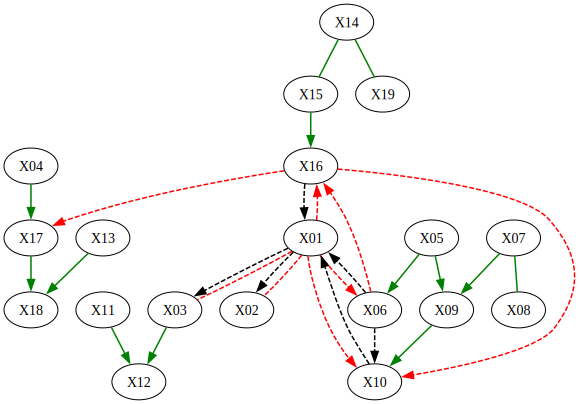

CPU times: user 26 s, sys: 1.35 s, total: 27.4 s
Wall time: 3.92 s
CPU times: user 9min 42s, sys: 59.8 s, total: 10min 41s
Wall time: 2min 52s


## Results of the data/bn-20n-20a-1-test4.csv

### Markov equivalence class (PAG)

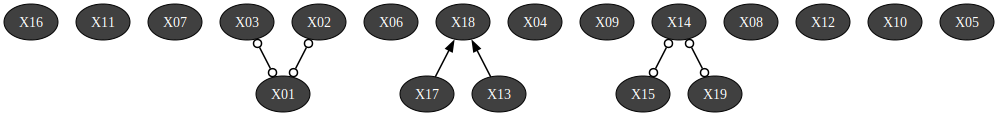

### Causal differences

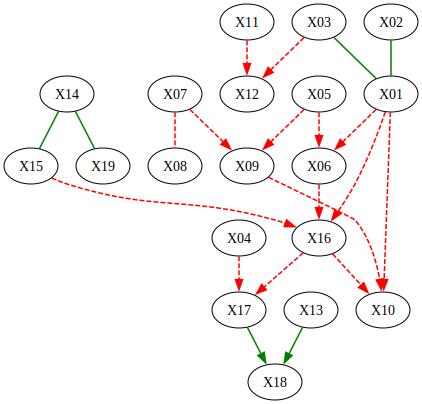

CPU times: user 24.7 s, sys: 1.32 s, total: 26 s
Wall time: 6.96 s
CPU times: user 4min 47s, sys: 29.9 s, total: 5min 17s
Wall time: 1min 23s


## Results of the data/bn-20n-20a-1-test5.csv

### Markov equivalence class (PAG)

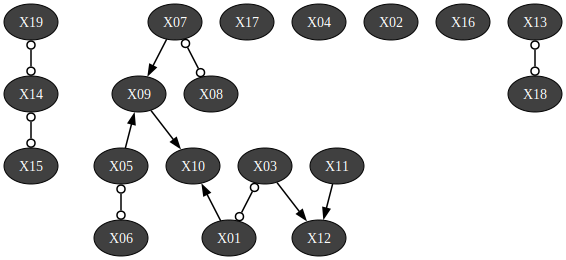

### Causal differences

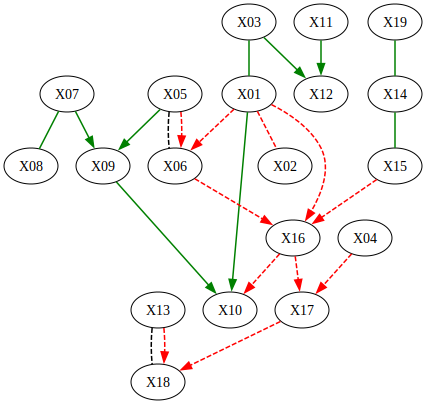

CPU times: user 23.2 s, sys: 1.31 s, total: 24.5 s
Wall time: 6.87 s
CPU times: user 2min 25s, sys: 13.7 s, total: 2min 39s
Wall time: 43.3 s


## Results of the data/bn-20n-20a-1-test7.csv

### Markov equivalence class (PAG)

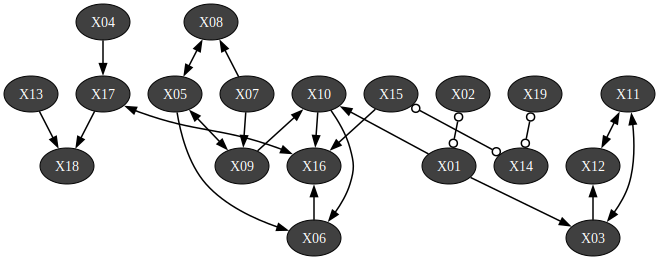

### Causal differences

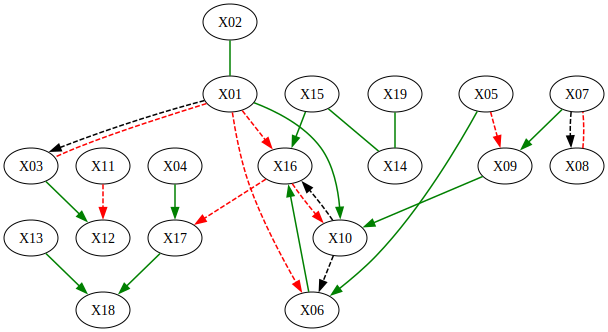

CPU times: user 23.6 s, sys: 1.35 s, total: 25 s
Wall time: 7.02 s
CPU times: user 1min 4s, sys: 6.18 s, total: 1min 10s
Wall time: 23.3 s


## Results of the data/bn-20n-20a-1-test6.csv

### Markov equivalence class (PAG)

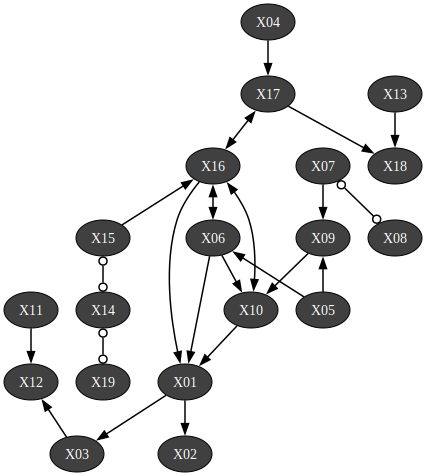

### Causal differences

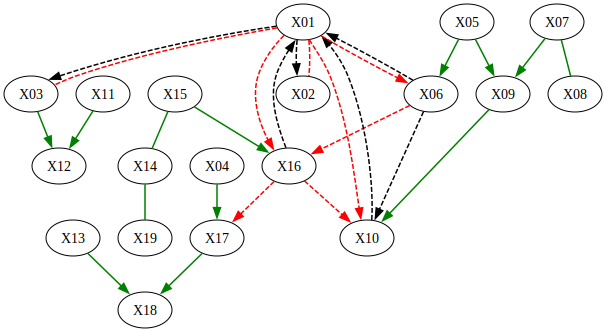

CPU times: user 25.1 s, sys: 1.34 s, total: 26.4 s
Wall time: 6.1 s
CPU times: user 1min 24s, sys: 5.65 s, total: 1min 30s
Wall time: 17.7 s


## Results of the data/bn-20n-20a-1-test2.csv

### Markov equivalence class (PAG)

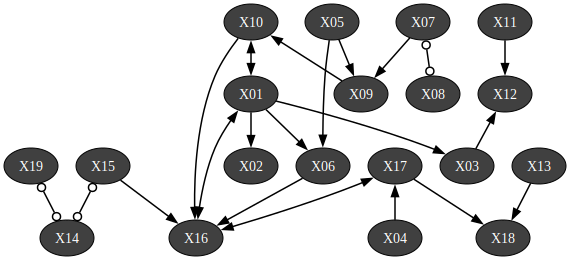

### Causal differences

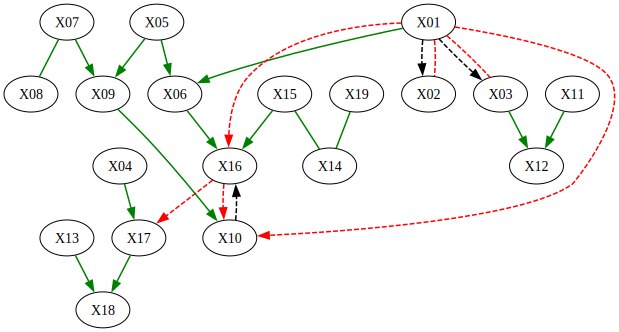

CPU times: user 23.1 s, sys: 1.2 s, total: 24.3 s
Wall time: 4.31 s
CPU times: user 1min 18s, sys: 5.99 s, total: 1min 24s
Wall time: 27.4 s


## Results of the data/bn-20n-20a-1-test3.csv

### Markov equivalence class (PAG)

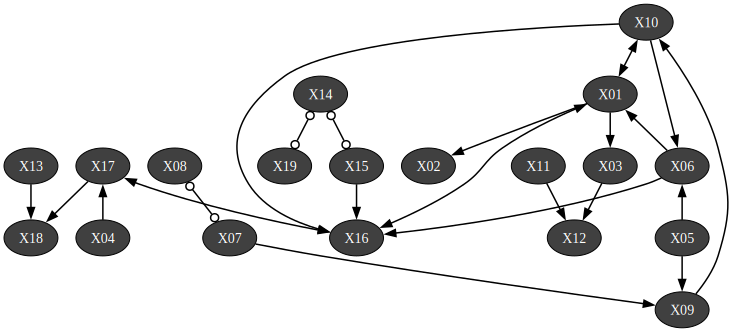

### Causal differences

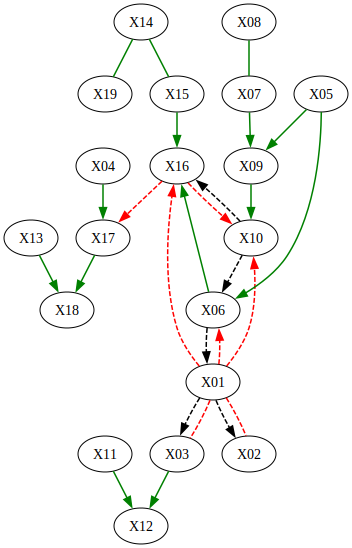

CPU times: user 26.2 s, sys: 1.51 s, total: 27.7 s
Wall time: 7.1 s
CPU times: user 5min 13s, sys: 33.1 s, total: 5min 46s
Wall time: 1min 26s


## Results of the data/bn-20n-20a-1-test1.csv

### Markov equivalence class (PAG)

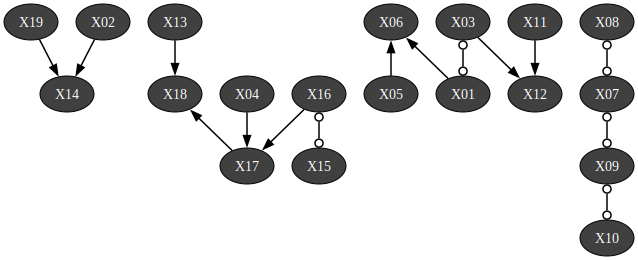

### Causal differences

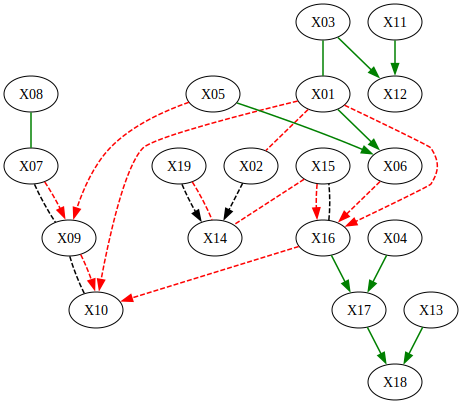

In [12]:
for name in Path("data/").glob("bn-20n-20a-1-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X00"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )